In [445]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')

# Loading the dataset
Bank_customer_data = pd.read_csv("C:/Users/manis/Downloads/archive (2)/Churn_Modelling.csv")
Bank_customer_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [466]:
# Preprocessing the data
def preprocess_data(df):
    """
    Preprocess the dataset by handling missing values, encoding categorical variables, and normalizing the data.
    
    Parameters:
    df (DataFrame): The input dataset.
    
    Returns:
    DataFrame: The preprocessed dataset.
    """
    df.dropna(inplace=True)
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Scale numeric data
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(numeric_df)
    
    # Create a DataFrame with scaled features
    df_scaled = pd.DataFrame(scaled_features, columns=numeric_df.columns)
    
    return df_scaled

# Adjusting column names based on the dataset
age_column = 'Age'
balance_column = 'Balance'
salary_column = 'EstimatedSalary'
creditscore_column = 'CreditScore'

df_scaled = preprocess_data(df)

In [449]:
# Calulation of the statistical moments function
def calculate_statistical_moments(df):
    """
    Calculate statistical moments for the dataset including mean, median, standard deviation, skewness, and kurtosis.
    
    Parameters:
    df (DataFrame): The input dataset.
    
    Returns:
    DataFrame: A dataframe containing the statistics.
    """
    top_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
    statistics = {
        'Mean': df[top_columns].mean(),
        'Median': df[top_columns].median(),
        'Standard Deviation': df[top_columns].std(),
        'Skewness': df[top_columns].skew(),
        'Kurtosis': df[top_columns].kurtosis()
    }
    return pd.DataFrame(statistics)
statistical_moments_df = calculate_statistical_moments(Bank_customer_data[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
display(statistical_moments_df)

,Mean,Median,Standard Deviation,Skewness,Kurtosis
CreditScore,650.528800,652.000,96.653299,-0.071607,-0.425726
Age,38.921800,37.000,10.487806,1.011320,1.395347
Balance,76485.889288,97198.540,62397.405202,-0.141109,-1.489412
EstimatedSalary,100090.239881,100193.915,57510.492818,0.002085,-1.181518


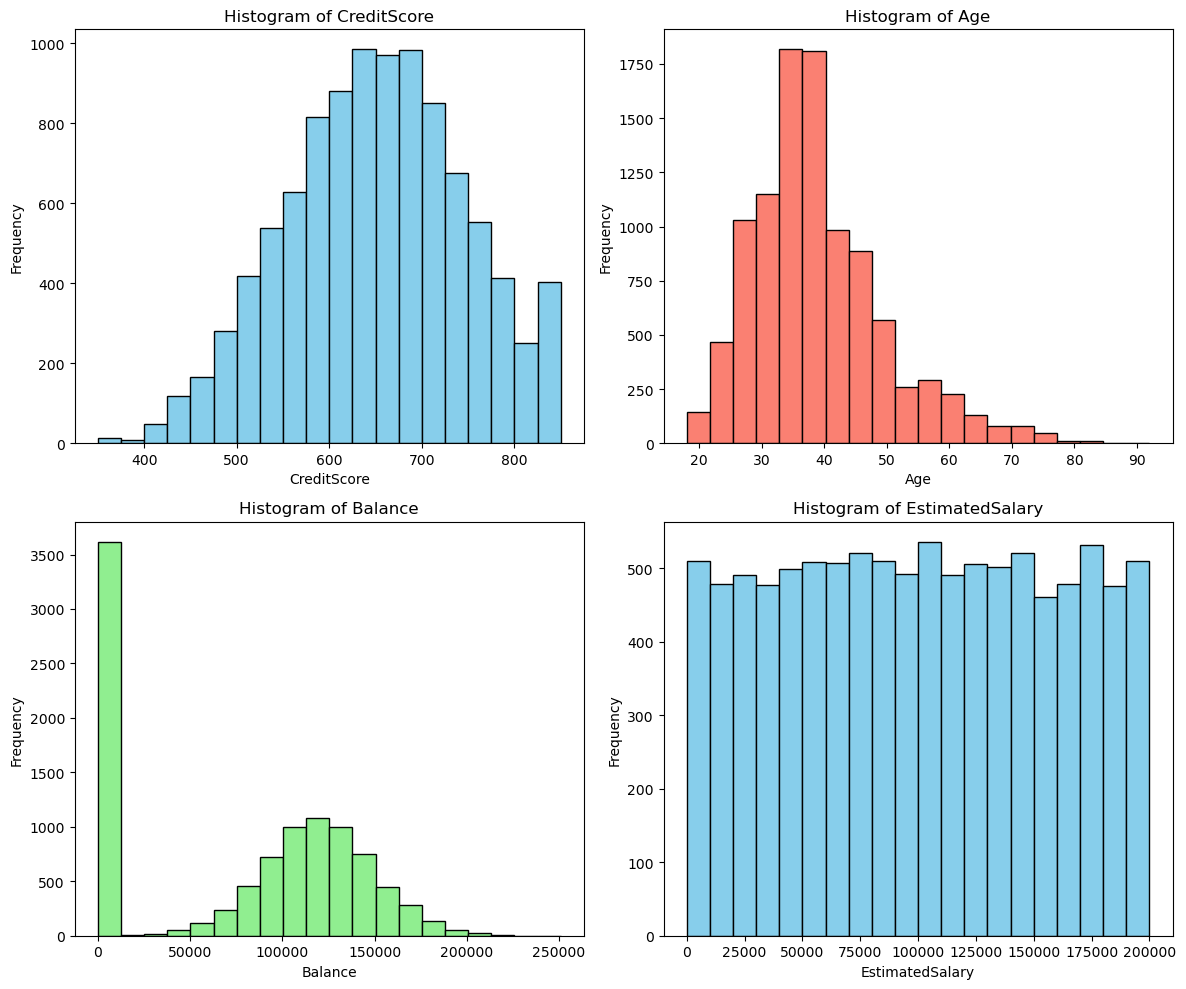

In [468]:
# Creating a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for CreditScore
axs[0, 0].hist(Bank_customer_data['CreditScore'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_xlabel('CreditScore')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Histogram of CreditScore')

# Histogram for Age
axs[0, 1].hist(Bank_customer_data['Age'], bins=20, color='salmon', edgecolor='black')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Histogram of Age')

# Histogram for Balance
axs[1, 0].hist(Bank_customer_data['Balance'], bins=20, color='lightgreen', edgecolor='black')
axs[1, 0].set_xlabel('Balance')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Histogram of Balance')

# Histogram chart for EstimatedSalary 
axs[1, 1].hist(Bank_customer_data['EstimatedSalary'], bins=20, color='skyblue', edgecolor='black')
axs[1, 1].set_xlabel('EstimatedSalary')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Histogram of EstimatedSalary')

plt.savefig("Histograms.png")
plt.tight_layout()
plt.show()

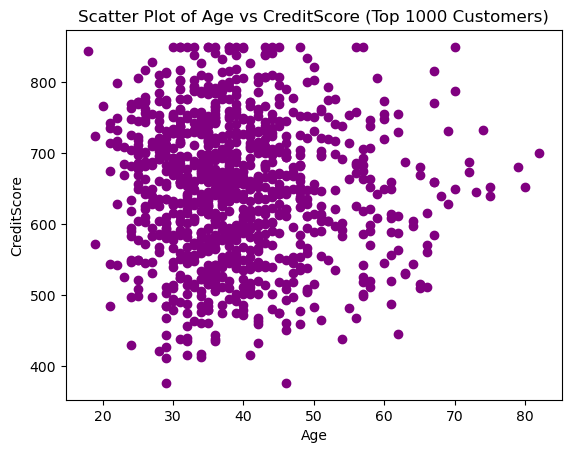

In [470]:
#Plotting a scatter plot for top1000 customers
top_1000_data = Bank_customer_data.head(1000)  # Select the top 2000 rows

plt.scatter(top_1000_data['Age'], top_1000_data['CreditScore'], color='purple')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('Scatter Plot of Age vs CreditScore (Top 1000 Customers)')
plt.savefig('Scatterplot.png')
plt.show()

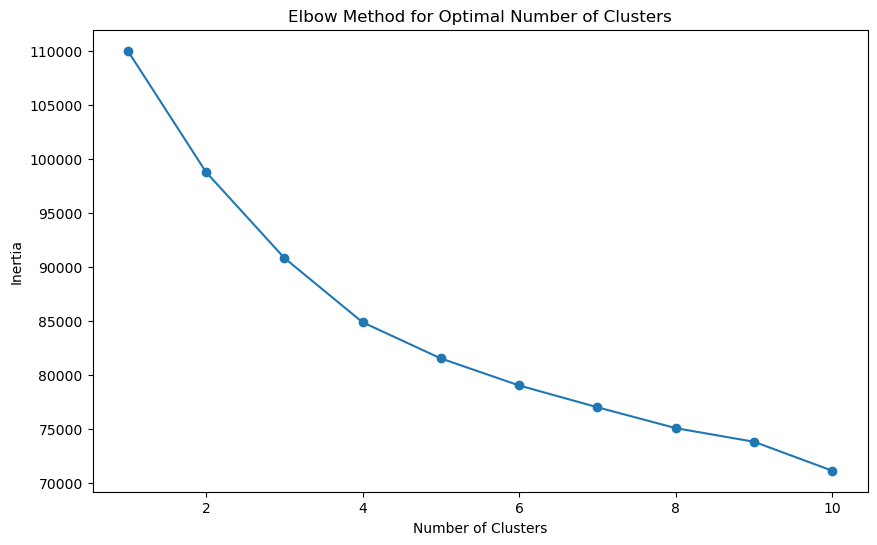

Inertia: 1333861210987.3730


In [472]:
# Plot for the Elbow Method
def plot_elbow_method(data, max_clusters=10):
    """
    Plot the elbow method to determine the optimal number of clusters.
    
    Parameters:
    data (DataFrame): The preprocessed dataset.
    max_clusters (int): The maximum number of clusters to consider.
    """
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.savefig("Elbowmethod.png")
    plt.show()

# Plot the elbow method to determine the optimal number of clusters
plot_elbow_method(df_scaled)
inertia = kmeans.inertia_
print(f"Inertia: {inertia:.4f}")

Cluster predictions: Cluster
0    3248
3    2405
1    2334
2    2013
Name: count, dtype: int64


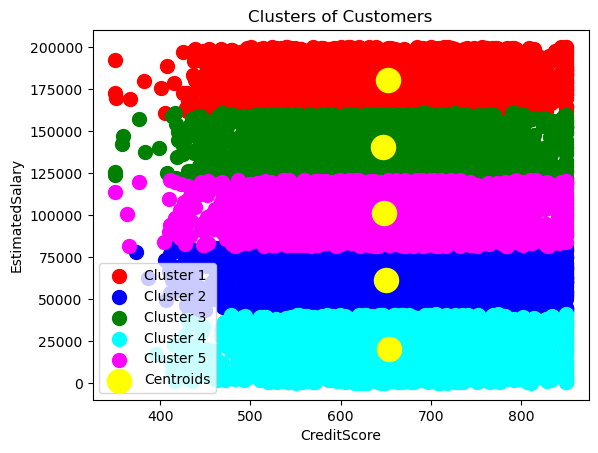

In [474]:
# Fiting KMeans model and predict clusters
def fit_kmeans(data, n_clusters):
    """
    Fit KMeans model and predict clusters.

    Parameters:
    data (DataFrame): The preprocessed dataset.
    n_clusters (int): The number of clusters to form.

    Returns:
    array: Cluster labels for each data point.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    return kmeans.predict(data)
n_clusters = 4  
cluster_labels = fit_kmeans(df_scaled, n_clusters)
df['Cluster'] = cluster_labels
print("Cluster predictions:", df['Cluster'].value_counts())
X = Bank_customer_data[['CreditScore', 'EstimatedSalary']]
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0]['CreditScore'], X[y_kmeans == 0]['EstimatedSalary'], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1]['CreditScore'], X[y_kmeans == 1]['EstimatedSalary'], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2]['CreditScore'], X[y_kmeans == 2]['EstimatedSalary'], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3]['CreditScore'], X[y_kmeans == 3]['EstimatedSalary'], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4]['CreditScore'], X[y_kmeans == 4]['EstimatedSalary'], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('CreditScore')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.savefig("Clusters.png")
plt.show()


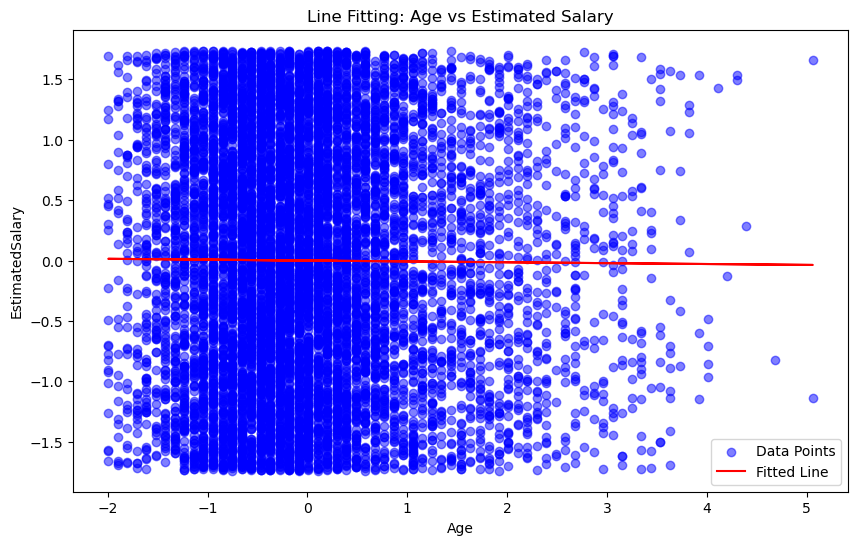

Predictions for new data points (age): [25 35 45]
Predicted estimated salary: [-0.18002606 -0.25203648 -0.32404691]


In [476]:
#Fitting and plotting the linear regression
def plot_line_fitting(data, x_column, y_column, title):
    """
    Fit a linear regression model and plot the results.

    Parameters:
    data (DataFrame): The preprocessed dataset.
    x_column (str): The name of the feature to use as the independent variable.
    y_column (str): The name of the feature to use as the dependent variable.
    title (str): The title of the plot.

    Returns:
    LinearRegression: The fitted linear regression model.
    """
    # Preparation of the independent (X) and dependent (y) variables
    X = data[x_column].values.reshape(-1, 1)
    y = data[y_column].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # Ploting the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
    plt.plot(X, y_pred, color='red', label='Fitted Line')
    plt.title(title)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.savefig("Line_Fitting.png")
    plt.show()
    
    return model

# Linefit and plot the data
model = plot_line_fitting(df_scaled, age_column, salary_column, 'Line Fitting: Age vs Estimated Salary')

# Predictions using the fitted line
new_data = np.array([[25], [35], [45]])  
predictions = model.predict(new_data)
print("Predictions for new data points (age):", new_data.flatten())
print("Predicted estimated salary:", predictions)


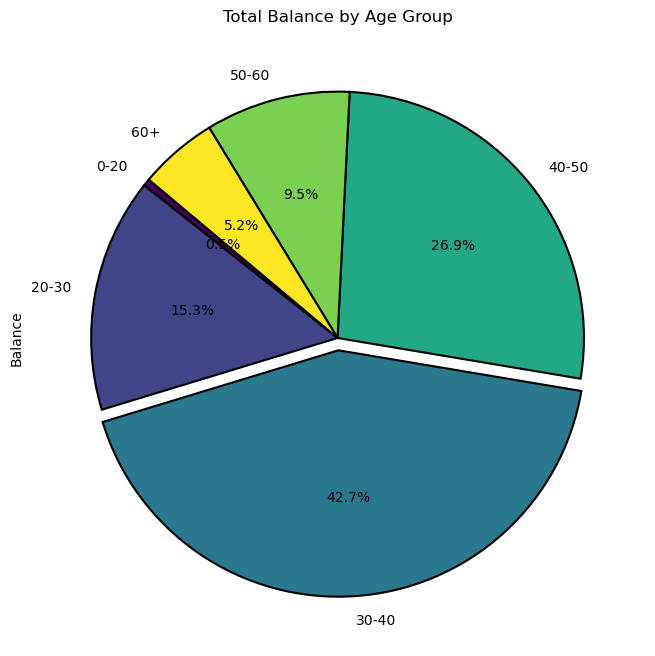

In [478]:
# Ploting a pie plot 
def pie_plot_age_balance(data, age_column, balance_column, age_bins, age_labels):
    """
    Create a pie plot to visualize the total balance maintained by different age groups, 
    highlighting the group with the highest balance and adding borders to the segments.
    
    Parameters:
    data (DataFrame): The dataset containing age and balance information.
    age_column (str): The name of the column representing age.
    balance_column (str): The name of the column representing balance.
    age_bins (list): The bins to group ages.
    age_labels (list): The labels for the age groups.
    """
    # Creating the age groups
    data['Age Group'] = pd.cut(data[age_column], bins=age_bins, labels=age_labels, right=False)
    age_balance = data.groupby('Age Group')[balance_column].sum()
    
    # Determine the group with the highest balance
    max_group = age_balance.idxmax()
    explode = [0.05 if group == max_group else 0 for group in age_balance.index]  # Highlight the max group
    wedgeprops = {"edgecolor": "black", "linewidth": 1.5}
    
    # Plot pie chart
    plt.figure(figsize=(10, 8))
    age_balance.plot(kind='pie', autopct='%1.1f%%', startangle=140, explode=explode, cmap='viridis', wedgeprops=wedgeprops)
    plt.title('Total Balance by Age Group')
    plt.savefig("Pieplot.png")
    plt.show()

# Define age bins and labels
age_bins = [0, 20, 30, 40, 50, 60, 100] 
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+'] 
    
# Plotting
pie_plot_age_balance(df, 'Age', 'Balance', age_bins, age_labels)


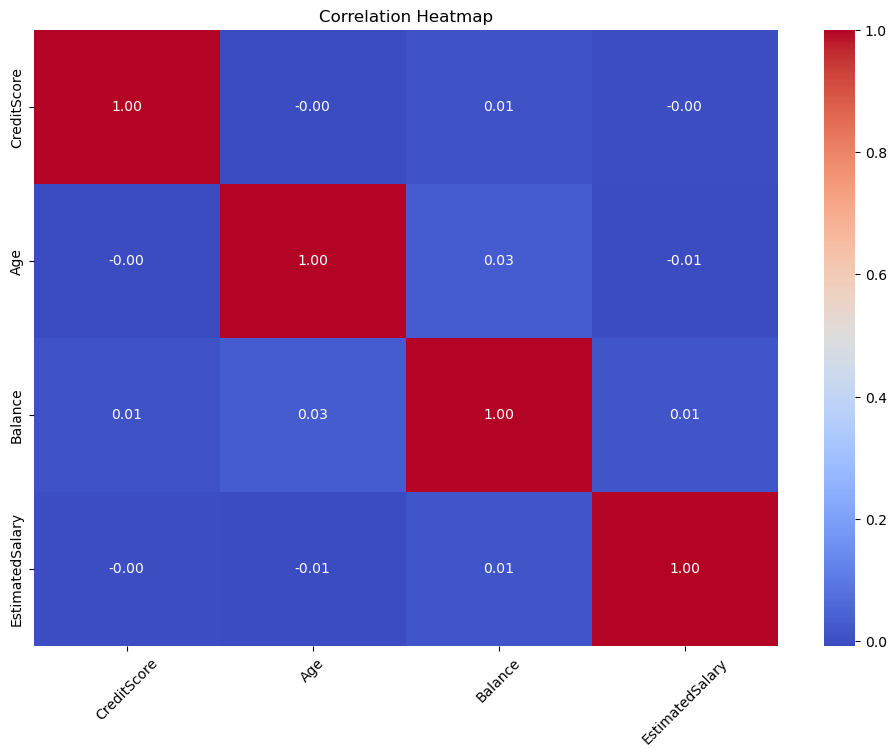

In [480]:
# Function for plotting heatmap
def plot_heatmap(data, title):
    """
    Plot a heatmap of the correlation matrix of the dataset.
    
    Parameters:
    data (DataFrame): The input dataset.
    title (str): The title of the plot.
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.savefig("Heatmap.png")
    plt.show()

top_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Plot heatmap using the selected columns
plot_heatmap(df[top_columns], 'Correlation Heatmap')